# IRIS Flower Classification
___

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png">

**About this project:**
* Iris flower classification tells about their measurements and it's respective species. There are three kind of species `Iris Setosa`, `Iris Versicolor`, `Iris Virginica`.

In [209]:
# import data analysis libraries
import numpy as np
import pandas as pd

# import visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import LabelEncoder

# machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
# import iris dataset
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* There are 150 samples in this datset, total 5 columns are there.
___

## Measurement stats

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Total 150 samples for each variable.
* Here we can see maximum Sepal Length is 7.9, maximum Sepal Width is 4.4, Maximum Petal Length is 6.9, and maximum petal Width is 2.5.
* In the mean we can observer highest sepal length is 5.84, highest sepal width is 3.05, highest petal length is 3.75, highest petal width is 1.1.

In [10]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* No null values contains in this dataset.
___

## Data Analysis

Text(0.5, 1.0, 'Distribution of sepal length')

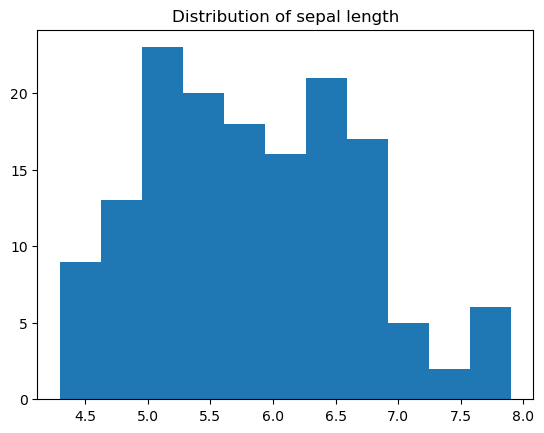

In [49]:
# sepal length distribution frequency
plt.hist(iris['sepal_length'], bins=11)
plt.title('Distribution of sepal length')

* The highest sepal length is 5.0.

Text(0.5, 1.0, 'Distribution of sepal width')

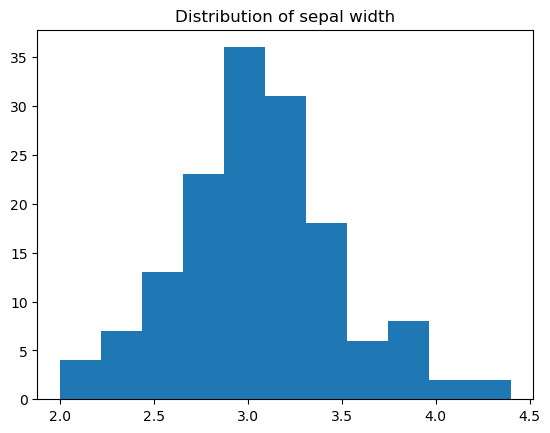

In [50]:
# sepal width distribution frequency
plt.hist(iris['sepal_width'], bins=11)
plt.title('Distribution of sepal width')

* The highest sepal width is 3.0.

Text(0.5, 1.0, 'Distribution of petal length')

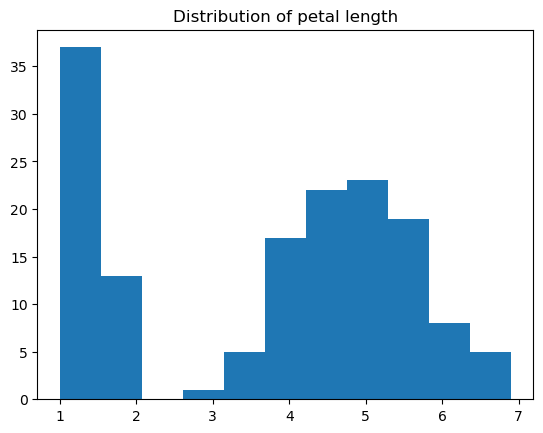

In [51]:
# petal length distribution frequency
plt.hist(iris['petal_length'], bins=11)
plt.title('Distribution of petal length')

* The highest petal length is 1.0.

Text(0.5, 1.0, 'Distribution of petal width')

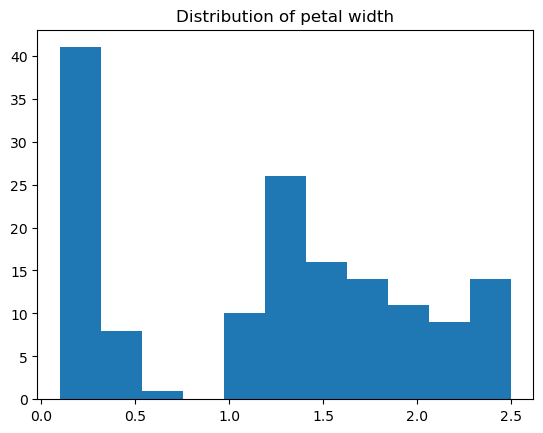

In [52]:
# petal width distribution frequency
plt.hist(iris['petal_width'], bins=11)
plt.title('Distribution of petal width')

* The highest petak width is 0.1
___

Text(0.5, 1.0, 'Distribution of Species Sepal Length and Width ')

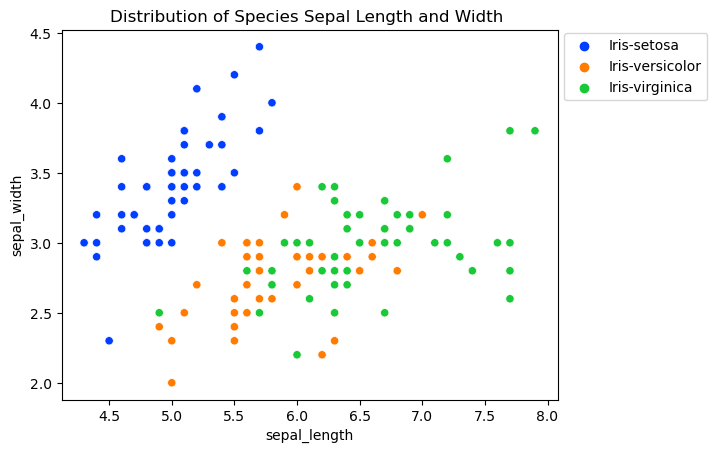

In [76]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width',hue='species', palette='bright')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Distribution of Species Sepal Length and Width ')

* There is a overlap between `Iris-versicolor` and `Iris-virginica`.

Text(0.5, 1.0, 'Distribution of Species petal Length and Width ')

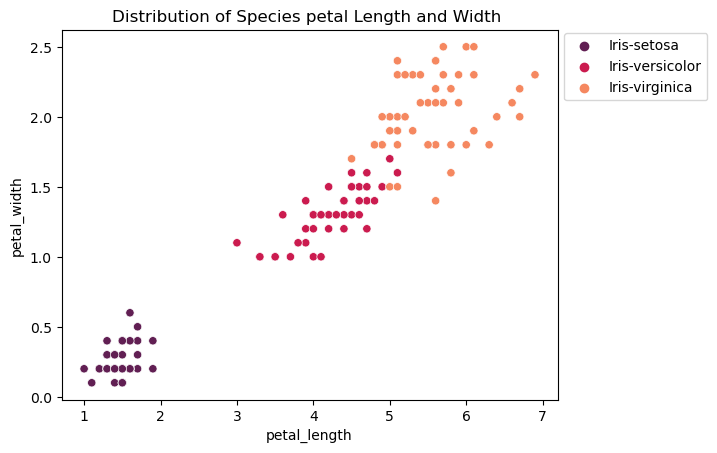

In [85]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width',hue='species', palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Distribution of Species petal Length and Width ')

* There is a overlap between `Iris-versicolor` and `Iris-virginica`.

Text(0.5, 1.0, 'Distribution of Species Sepal Length and Petal Length')

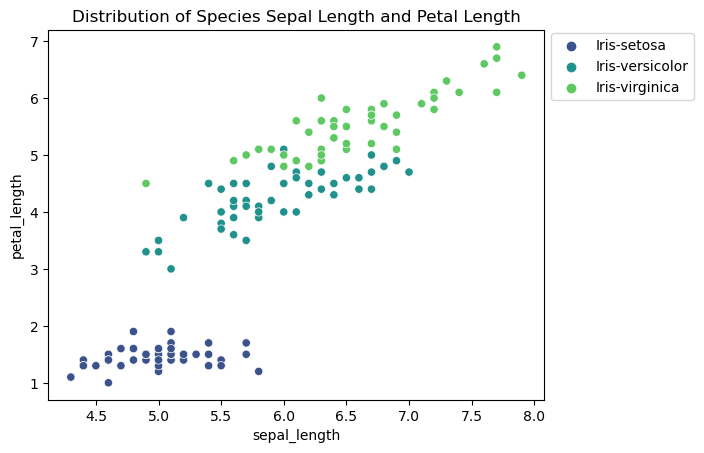

In [89]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length',hue='species', palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Distribution of Species Sepal Length and Petal Length')

* Here also there is a overlap between Sepal length of Iris-Versicolor, Petal length of Iris-Viriginica. So there is a correlation between `sepal and petal lengths`.

Text(0.5, 1.0, 'Distribution of Species Sepal Width and Petal Width')

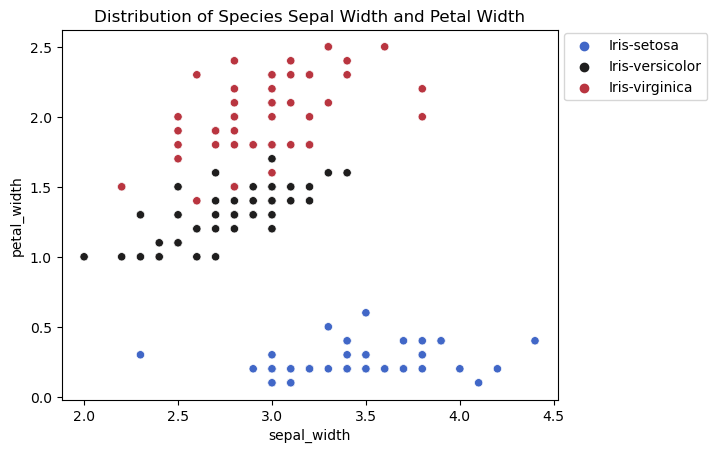

In [95]:
sns.scatterplot(data=iris, x='sepal_width', y='petal_width',hue='species', palette='icefire')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Distribution of Species Sepal Width and Petal Width')

* There is a overlap between Sepal width of Iris-Versicolor, Petal width of Iris-Viriginica. So there is a correlation between `sepal and petal widths`.

### Let's Checkout for correlation
* If two variables have high correlation, we can neglet one variable.

In [98]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

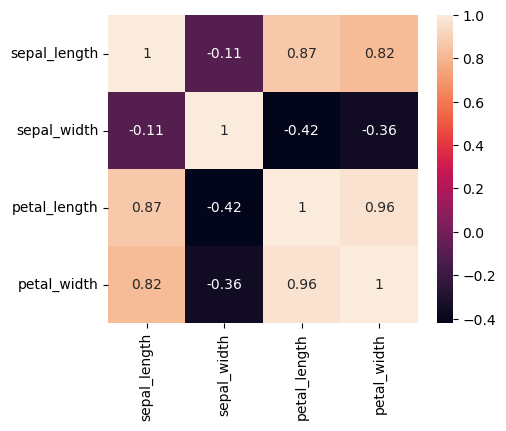

In [122]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=corr, annot=True, ax=ax)

* We can observe for a very low near correlation between two variables.

## Data Transformation
**Let's change the Species column to numerical column to identify the machine learning model during training session. For that, using label encoder to change the species column to numerical column.**

In [123]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

* There are three species in the species column, So the label encoder assign the numerical values to `Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2`.

In [125]:
le = LabelEncoder()
le

LabelEncoder()

In [135]:
iris['species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split the Data

In [229]:
x = iris.drop(columns=['species'])
y = iris['species']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Model Training

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [197]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [198]:
print('Accuracy: ', lr.score(x_train,y_train)*100)

Accuracy:  95.23809523809523


In [199]:
y_lr_pred = lr.predict(x_test)
y_lr_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0], dtype=int64)

In [200]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [201]:
print('Accuracy: ', kn.score(x_train,y_train)*100)

Accuracy:  98.09523809523809


In [203]:
y_kn_pred = kn.predict(x_test)
y_kn_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0], dtype=int64)

## Model Evaluation

In [202]:
# Accuracy Score for Logistic Regression
accuracy = accuracy_score(y_test, y_lr_pred)
accuracy

0.9777777777777777

In [204]:
# Accuracy Score for KNeighbors
accuracy = accuracy_score(y_test, y_kn_pred)
accuracy

0.9777777777777777

In [210]:
Confusion_Matrix = confusion_matrix(y_test,y_lr_pred)
Confusion_Matrix

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]], dtype=int64)

<Axes: >

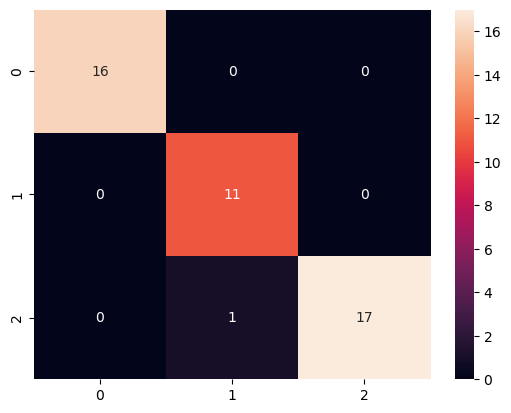

In [214]:
sns.heatmap(data=Confusion_Matrix, annot=True)

## Saving the model

In [215]:
import pickle

In [217]:
with open('Iris Flower', 'wb') as m:
    pickle.dump(kn,m)

In [218]:
with open('Iris Flower','rb') as m:
    model = pickle.load(m)

In [219]:
import joblib

In [220]:
joblib.dump(model, 'Iris_Flower.pkl')

['Iris_Flower.pkl']

## Predicting the Model

In [221]:
model.predict(x_test)

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0], dtype=int64)

In [226]:
prediction = joblib.load('Iris_Flower.pkl')

In [227]:
pred_observation = [[5.1, 3.5, 1.4, 0.2]]

In [228]:
prediction.predict(pred_observation)

array([0], dtype=int64)

## Thank You